In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [4]:
DataFrame=pd.read_csv("HEARTDATA (2).csv")
DataFrame.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Data Analysis


In [5]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
DataFrame.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Correlation Matrix

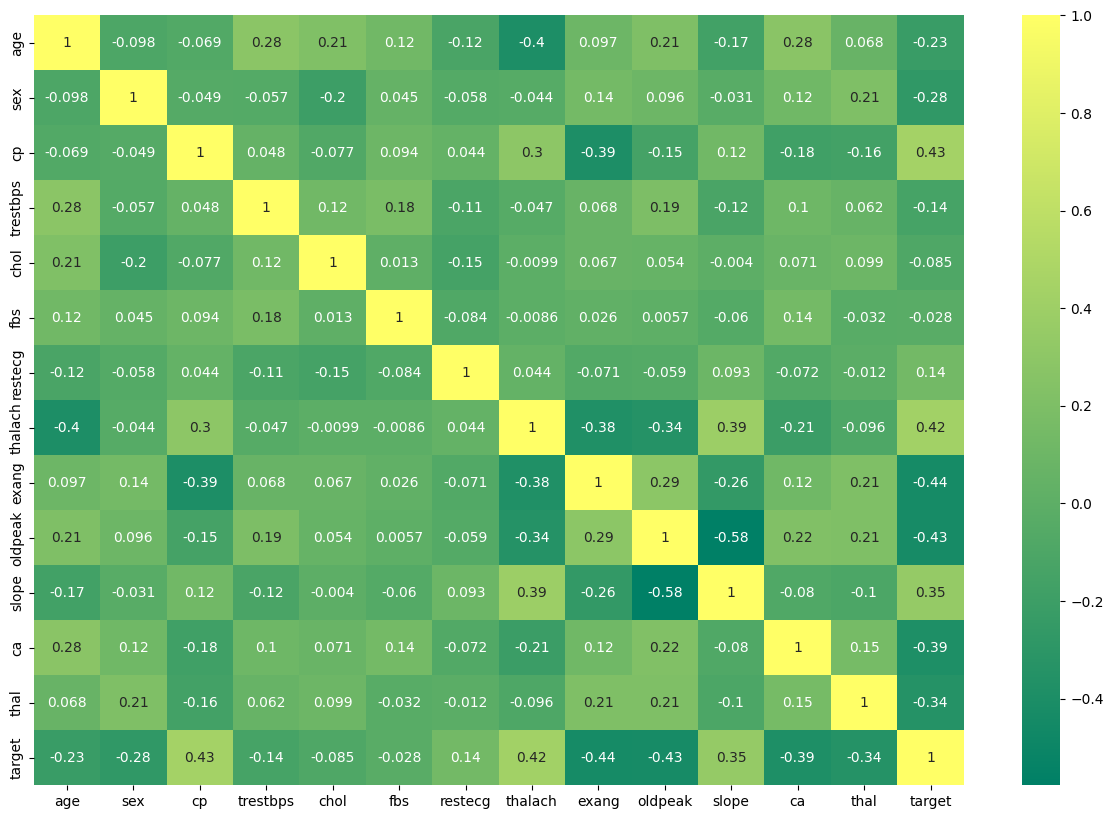

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(DataFrame.corr(),linewidth=.001,annot=True,cmap="summer")
plt.show()
plt.savefig('correlationfigure')

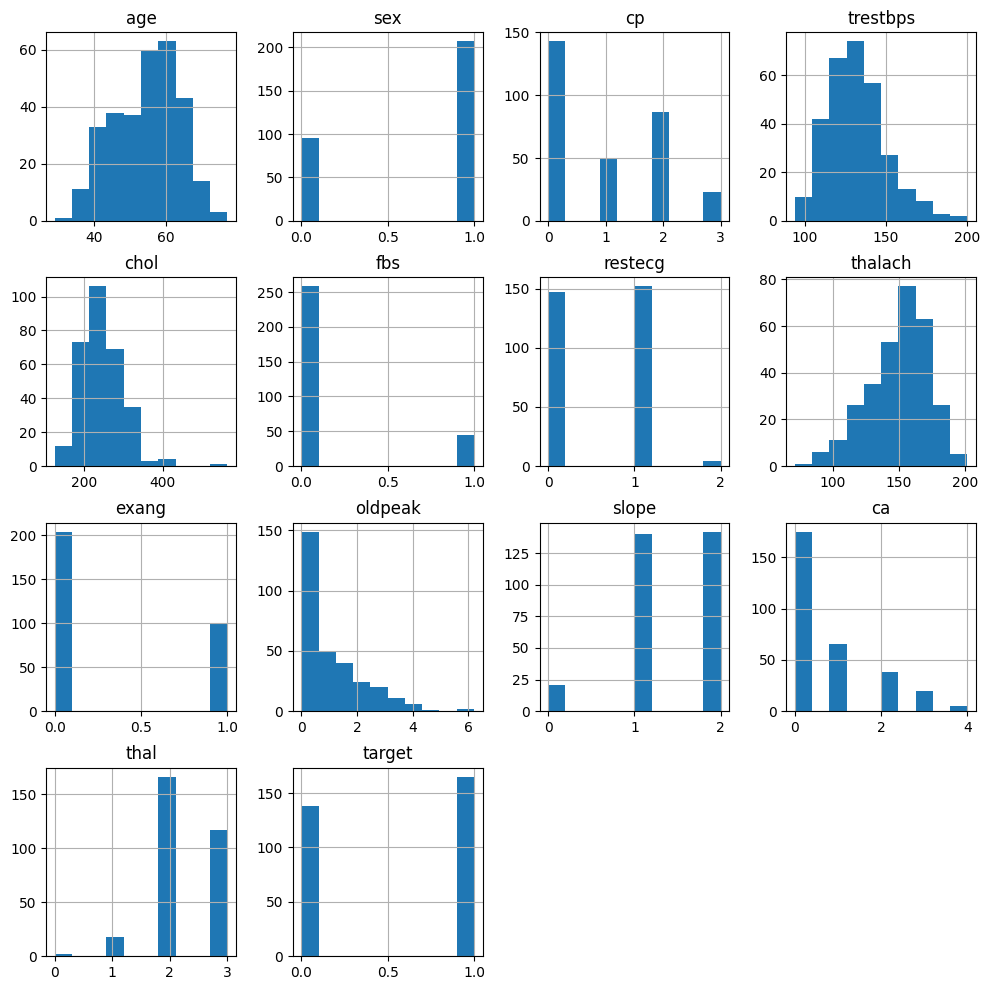

In [8]:
DataFrame.hist(figsize=(12,12))
plt.savefig('featuresplot')

# train-test split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report


from sklearn import metrics

In [10]:
X = DataFrame.drop('target',axis=1).values
y = DataFrame['target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=40)

# Algorithm Implementation

# 1 .Logistic Regression

C:\Users\Soumyajit Rout\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing Accuracy for Logistic Regression: 0.881578947368421
Testing Sensitivity for Logistic Regression: 0.9032258064516129
Testing Specificity for Logistic Regression: 0.8666666666666667
Testing Precision for Logistic Regression: 0.8235294117647058


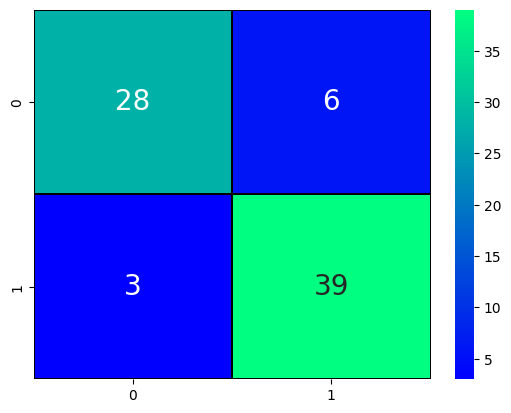

In [11]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.87      0.93      0.90        42

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



# 2. Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.93      1.00      0.97        42

    accuracy                           0.96        76
   macro avg       0.97      0.96      0.96        76
weighted avg       0.96      0.96      0.96        76

Testing Accuracy for Decision Tree: 0.9605263157894737
Testing Sensitivity for Decision Tree: 1.0
Testing Specificity for Decision Tree: 0.9333333333333333
Testing Precision for Decision Tree: 0.9117647058823529


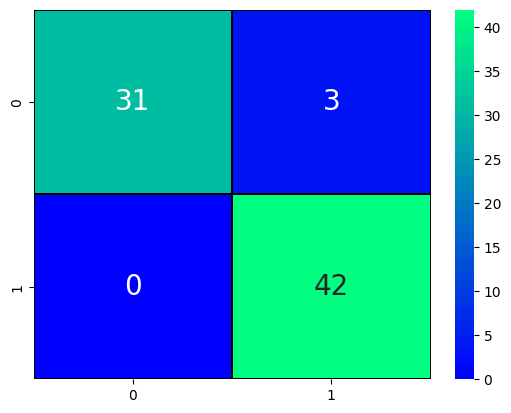

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

# 3. Random Forest Classifier

Testing Accuracy for Random Forest: 0.868421052631579
Testing Sensitivity for Random Forest: 0.875
Testing Specificity for Random Forest: 0.8636363636363636
Testing Precision for Random Forest: 0.8235294117647058


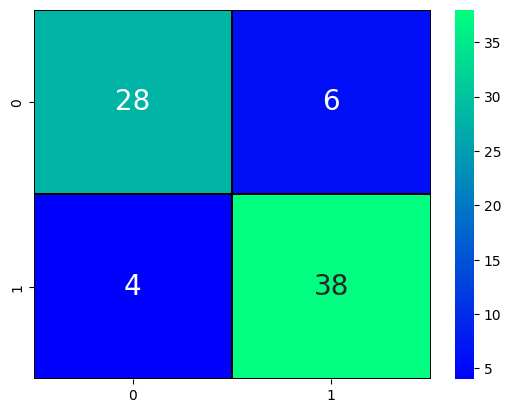

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]

print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [15]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        34
           1       0.86      0.90      0.88        42

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76



# 4. Support Vector Machines(SVM)

Testing Accuracy for SVM: 0.868421052631579
Testing Sensitivity for Random Forest: 0.8529411764705882
Testing Specificity for Random Forest: 0.8809523809523809
Testing Precision for Random Forest: 0.8529411764705882


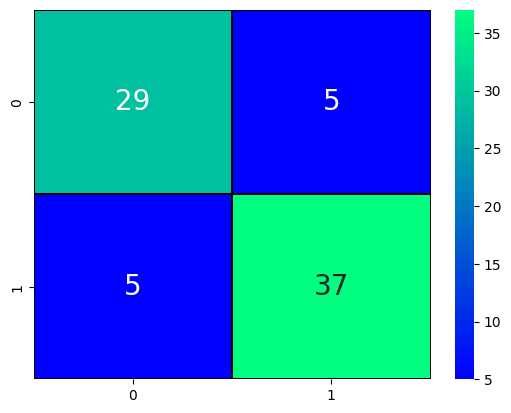

In [16]:
from sklearn.svm import SVC
svm=SVC(C=12,kernel='linear')
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]
  
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [17]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        34
           1       0.88      0.88      0.88        42

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



# Final Model Implementation

In [18]:
input=(63,1,3,145,233,1,0,150,0,2.3,0,0.1,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be have heart disease:(


In [21]:
input=(72,1,0,125,200,1,0,150,0,1.3,2,1,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be Normal:)
